# Predicción de parámetros en estrellas masivas

* **Objetivo del proyecto**: Aprender a usar métodos ML para predecir parámetros estelares de espectros de estrellas masivas.

* **Descripción**: La estimación de parámetros estelares a partir de espectros es una tarea fundamental en astrofísica. En particular, el análisis de estrellas masivas requiere métodos precisos para estimar  parámetros como la temperatura efectiva (Teff), la velocidad de rotación (v sin i), la gravedad superficial (log g), la luminosidad estelar, la velocidad terminal del viento estelar, entre otros.

* **Datos**: ISOSCELES.  Se utilizará un subconjunto de la base de datos ISOSCELES, considerando específicamente la línea espectral H-alpha y fijando la velocidad de microturbulencia en 10 km/s. Además, se evaluará la capacidad del modelo para generalizar a espectros observados. Se predecirán los parámetros: **temperatura efectiva, log g, y pérdida de masa**.


## Bibliotecas de Python

In [30]:
import os
import sys
import numpy as np
from matplotlib import pyplot as plt

## Carga de espectros

In [41]:
# Dataset provided by PhD (c) Daniela Turis, IFA-UV.

# Verifica si estás en Google Colab
IN_COLAB = 'google.colab' in sys.modules

if IN_COLAB:
    # En Colab, usamos gdown
    import gdown
    !gdown https://drive.google.com/uc?id=14NHeV1fvE2HXMaghHAszf_92iTBVNJHL
    !gdown  https://drive.google.com/uc?id=1g56JSd46v1HjJkhpIw7Qkal--VDd7cpS
    !gdown  https://drive.google.com/uc?id=1YA9HYeOKHMYvt9M4LAaLkO8mpJjOXktV

    data = np.load("subset_vmic10.npy")
    y = np.load("y_subset_vmic10.npy")

else:
    # En entorno local, carga desde disco
    dir_path = "/Users/rpezoa/experiment_data/data_fo/data_vmic10/"
    if os.path.exists(dir_path):
        print("Archivo cargado localmente:", dir_path + "subset_vmic10.npy")
        data = np.load(dir_path + "subset_vmic10.npy")
        y = np.load(dir_path + "y_subset_vmic10.npy")
        data_observed = np.load("/Users/rpezoa/experiment_data/data_fo/data/X_observed.npy")

    else:
        print("No se encontró el archivo local. Debes descargarlo manualmente.")





Archivo cargado localmente: /Users/rpezoa/experiment_data/data_fo/data_vmic10/subset_vmic10.npy


## Ejemplo de un espectro sintético

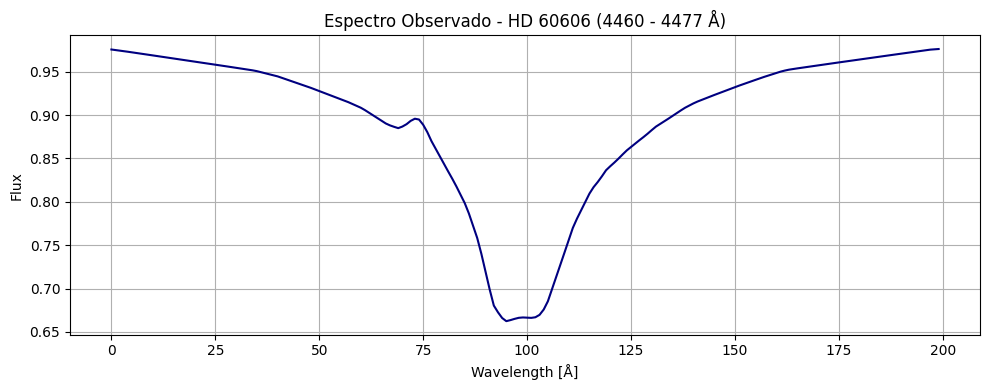

array([ 3.20000000e+04,  3.60000000e+00,  5.00389117e+00,  4.50000000e-01,
        2.50000000e-01,  3.30000000e-01,  4.16556090e+02, -7.04938602e+00,
        7.36000000e+00])

In [32]:
i = 1503
# Graficar el espectro
plt.figure(figsize=(10, 4))
plt.plot(range(200), data[i,:], color="navy", lw=1.5)
plt.xlabel("Wavelength [Å]")
plt.ylabel("Flux")
plt.title("Espectro Observado - HD 60606 (4460 - 4477 Å)")
plt.grid(True)
plt.tight_layout()
# Guardar a archivo PNG
plt.savefig("spectrum_hd60606_4460_4477.png", dpi=300)
plt.show()

y[i]


## Etapas del proyecto
***

## Obtención de Datos


In [33]:
data.shape

(10000, 200)

In [35]:
y.shape
# TEFF (temperatura efectiva), LOGG (logaritmo de la gravedad superficial), LOGLSTAR (logaritmo de la luminosidad de la estrella), 
# # ALPHA, K, DELTA (alpha, k y delta son los parámetros de fuerza de línea), 
# # VINF (velocidad terminal), LOGMDOT (logaritmo de la tasa de pérdida de masa), SI (abundancia del silicio)



(10000, 9)

* Solo se debe seleccionar la TEFF, LOGG y 

## Exploratory Data Analysis (EDA)


## Generación de datos de training, validation, y testing

## Diseño e implementación de Método ML para predicción de parámetros

## Validación en testing set


## Validación en datos observados

*  Los datos observdados vienen con 8 líneas, y 200 los puntos de flujo cada línea.
* Las líneas en orden son: Si IV 4089,  Hgamma, He I 4387, He I 4471, Si III 4552, Hbeta, Halpha y He I 6678.
* Hay que sacar solo la línea Halpha, para evaluar, ya que nuestros datos de entrenamiento solo contienen H-alpha.

In [61]:
data_observed.shape

(76, 8, 200)

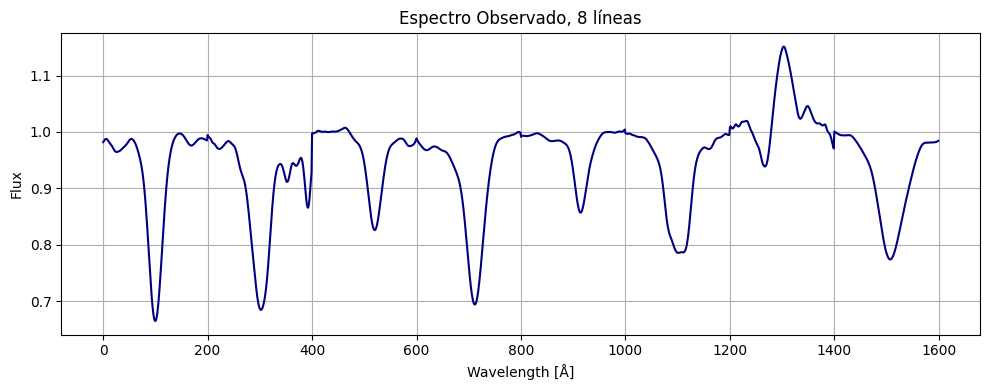

In [56]:
plt.figure(figsize=(10, 4))
plt.plot(range(1600), data_observed[0,:,:].ravel(), color="navy", lw=1.5)
plt.xlabel("Wavelength [Å]")
plt.ylabel("Flux")
plt.title("Espectro Observado, 8 líneas")
plt.grid(True)
plt.tight_layout()
# Guardar a archivo PNG
#plt.savefig("spectrum_hd60606_4460_4477.png", dpi=300)
plt.show()

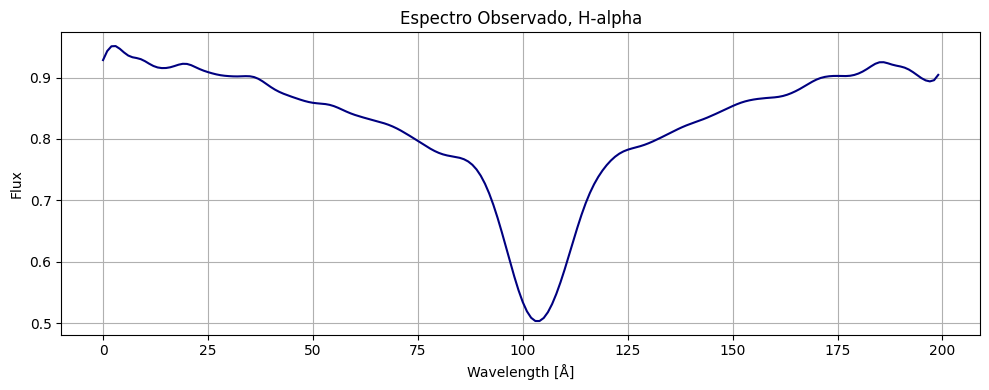

In [60]:
plt.figure(figsize=(10, 4))
plt.plot(range(200), data_observed[12,6,:], color="navy", lw=1.5)
plt.xlabel("Wavelength [Å]")
plt.ylabel("Flux")
plt.title("Espectro Observado, H-alpha")
plt.grid(True)
plt.tight_layout()
# Guardar a archivo PNG
#plt.savefig("spectrum_hd60606_4460_4477.png", dpi=300)
plt.show()